<a href="https://colab.research.google.com/github/mohamed-alkasem/bilgi_guvenligi_final_odevi/blob/main/alkasemcifar-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib scikit-learn

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, y_train = x_train[:7000], y_train[:7000]
x_test, y_test = x_test[:1000], y_test[:1000]

# تطبيع البيانات
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    validation_split=0.2
)
datagen.fit(x_train)

In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
for layer in base_model.layers[:-4]:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 7,347,210 (28.03 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [5]:
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=16, subset='training'),
    validation_data=datagen.flow(x_train, y_train_cat, batch_size=16, subset='validation'),
    epochs=50,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.1575 - loss: 2.3095 - val_accuracy: 0.4257 - val_loss: 1.7752
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3683 - loss: 1.7987 - val_accuracy: 0.5050 - val_loss: 1.4972
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.4624 - loss: 1.5508 - val_accuracy: 0.5414 - val_loss: 1.3501
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5140 - loss: 1.4083 - val_accuracy: 0.5614 - val_loss: 1.2601
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5416 - loss: 1.3045 - val_accuracy: 0.5864 - val_loss: 1.1907
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5783 - loss: 1.2331 - val_accuracy: 0.5929 - val_loss: 1.1600
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6024 - loss: 1.1614 - val_accuracy: 0.6043 - val_loss: 1.1547
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6151 - loss: 1.1244 - val_accuracy: 0.61

In [6]:
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7103 - loss: 0.9021
Test Loss: 0.9578, Test Accuracy: 0.6940


In [7]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
Confusion Matrix:
 [[72  5  3  1  2  1  0  5  9  5]
 [ 2 74  0  0  0  3  0  0  1  9]
 [ 8  0 57  4  6  7  8  9  0  1]
 [ 3  4  4 48  5 18 12  6  2  1]
 [ 2  0  8  3 48  2 11 14  2  0]
 [ 0  1  6 12  6 46  5  9  0  1]
 [ 0  0  4  1  2  6 93  3  1  2]
 [ 1  1  0  3  3  8  2 84  0  0]
 [10  4  1  0  1  1  1  0 84  4]
 [ 3 10  2  1  1  0  1  0  3 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       103
           1       0.75      0.83      0.79        89
           2       0.67      0.57      0.62       100
           3       0.66      0.47      0.55       103
           4       0.65      0.53      0.59        90
           5       0.50      0.53      0.52        86
           6       0.70      0.83      0.76       112
           7       0.65      0.82      0.72       102
           8       0.82      0.79      0.81       106
           9       0.79      0.81      0.80  

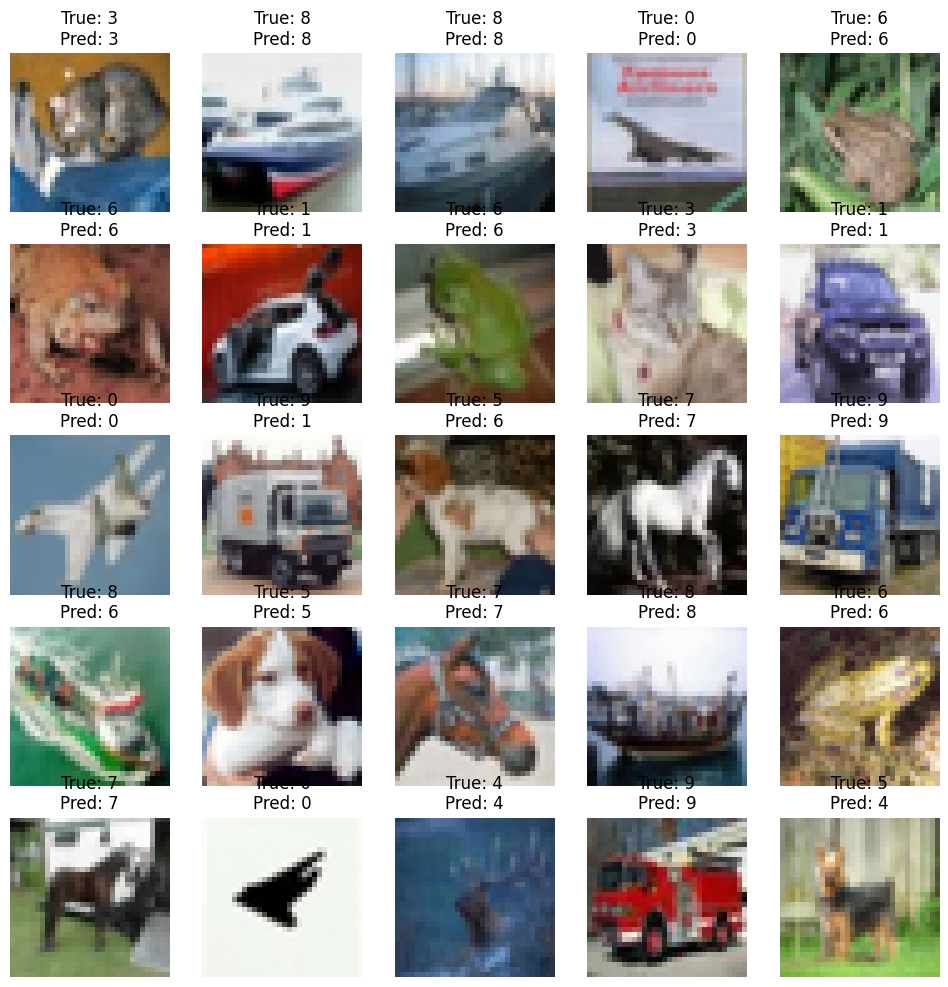

In [8]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {y_test[i][0]}\nPred: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

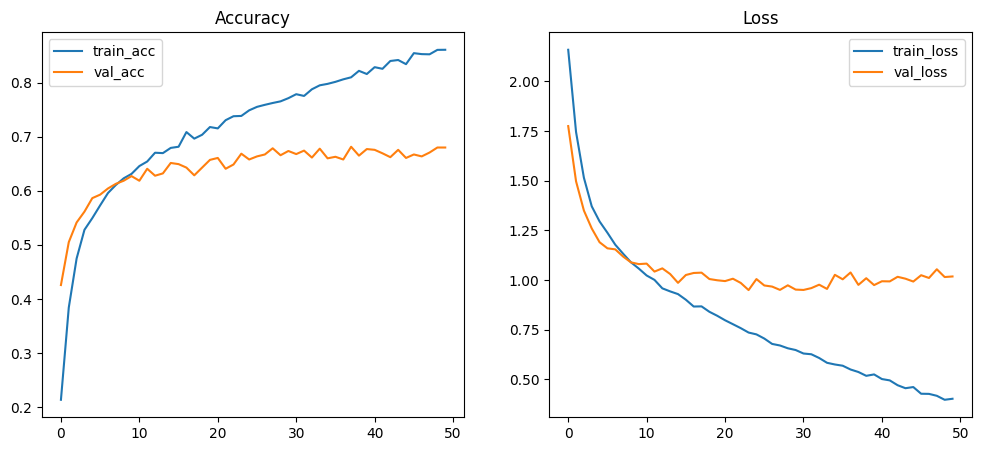

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()